<img src="../images/fake-news-quotes-01-830x467.jpeg" width="800" height="70" />

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
import datetime


[nltk_data] Downloading package stopwords to /home/ki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Get data 
[data source](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

In [2]:
df_0 = pd.read_csv("../data/archive/Fake.csv")
df_1 = pd.read_csv("../data/archive/True.csv")

### 1. EDA

<img src="../images/Screenshot 2021-05-17 at 16.24.54.png
" width="300" height="50" />

In [3]:
df_0.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_1.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
# adding category 0 to fake news and category 1 to true news
df_0["category"] = 0
df_1["category"] = 1

In [81]:
# concatenating dataframes
df = pd.concat([df_0, df_1],axis=0)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
# saving dataframe as CSV
df.to_csv(f'../data/df_fakenews_merge.csv', index=False)

In [8]:
# quick overview of the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
# Return the number of missing values in each column
df.isnull( ).sum( )

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
# Number of unique elements in "subjetc" column
df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [11]:
# Statistical summary for numerical columns present in the dataset. 
# Not to much sense on this dataframe
df.describe()

,category
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
# getting number of dimensions as well as the size in each dimension
df.shape

(44898, 5)

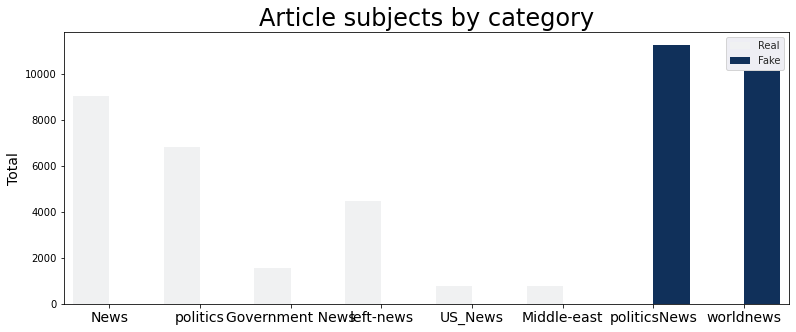

In [13]:
# Ploting a first overview of the data
plt.figure(figsize=(13,5))
sns.countplot(x='subject', data=df, hue='category', color='#042f66')

plt.title('Article subjects by category', fontsize=24)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real', 'Fake'])
plt.show()

### 3. Data Cleaning

<img src="../images/data_cleaning.jpeg" width="300" height="50" />

In [14]:
# Detect missing values for an array-like object.
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [15]:
# removing a row that has a NaN or missing values in it.
df.dropna(inplace=True)

In [16]:
# analyzing duplicated values
df.duplicated().sum()

209

In [17]:
# drop duplicates
df = df.drop_duplicates()

In [18]:
# counting duplicated rows in "title" column
df["title"].duplicated().sum()

5960

In [19]:
df["text"].duplicated().sum()

6043

---------------

##### I want to see how many duplicated "titles" and "texts" belong to fake_news 

In [20]:
df_0["title"].duplicated().sum()

5578

In [21]:
df_0["text"].duplicated().sum()

6026

Most of the duplicated rows belong to fake news..... maybe this goes back to the need to repeat a message to reaffirm it or probably as well to the weak imagination of the inventors of lies. 

-------

In [22]:
# drop duplicated rows on "text" column
df = df.drop_duplicates(subset=['text'])

In [23]:
# drop duplicated rows on "title" column
df = df.drop_duplicates(subset=['title'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38270 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     38270 non-null  object
 1   text      38270 non-null  object
 2   subject   38270 non-null  object
 3   date      38270 non-null  object
 4   category  38270 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [106]:
# preparing a sample to work on it better than working whit the whole dataframe
df_sample = df.sample(100)
df_sample

,title,text,subject,date,category
29653,Washington police chief says violent protest a...,WASHINGTON (Reuters) - A violent protest that ...,politicsNews,"January 20, 2017",1
28041,"Seeking end to boycott, North Carolina rescind...",(Reuters) - North Carolina on Thursday repeale...,politicsNews,"March 30, 2017",1
24484,U.S. appoints new top official at Havana embas...,HAVANA (Reuters) - The United States said on T...,politicsNews,"October 26, 2017",1
31262,Melania Trump calls taped comments by Donald T...,(Reuters) - Melania Trump rose to her husband’...,politicsNews,"October 18, 2016",1
36604,Former Egypt interior minister Habib al-Adly a...,CAIRO (Reuters) - Former Egyptian interior min...,worldnews,"December 5, 2017",1
...,...,...,...,...,...
43702,Al Qaeda warns Myanmar of 'punishment' over Ro...,YANGON (Reuters) - Al Qaeda militants have cal...,worldnews,"September 13, 2017",1
19185,ELECTIONS HAVE CONSEQUENCES: MUSLIM MAYOR Make...,Nothing says respect for America and for your ...,left-news,"Feb 6, 2017",0
17247,DEMOCRATS THREATEN KIDS EDUCATION: CHICAGO TEA...,It s painful to watch the stupidity and irresp...,Government News,"Jun 24, 2015",0
34608,Vice President Biden chides Turkey over freedo...,ISTANBUL (Reuters) - U.S. Vice President Joe B...,politicsNews,"January 22, 2016",1


In [107]:
# setting up the function to work on the sample and later work with the whole dataframe.
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

def stopwords(news):
    new_news = []
    news = news.lower()
    news = re.sub(r'[^\w\s]+'," ",news) # removing characters
    news = re.sub('https?://\S+|www\.\S+', '', news) # removing link of web page from string
    news = re.sub(" \d+", " ", news) # removing digits
    news = re.sub(r'(?:^| )\w(?:$| )', ' ', news) # removing any single letter on a string in python
    news = re.sub("reuters","", news) 
    for word in news.split():
        if word not in en_stops:
            new_news.append(word.lower())           
    return new_news # I dont want to convert list to string yet because I want to count repeated words

In [108]:
df_sample['text'] = df_sample['text'].apply(stopwords)
df_sample['title'] = df_sample['title'].apply(stopwords)
df_sample

,title,text,subject,date,category
29653,"[washington, police, chief, says, violent, pro...","[washington, violent, protest, erupted, washin...",politicsNews,"January 20, 2017",1
28041,"[seeking, end, boycott, north, carolina, resci...","[north, carolina, thursday, repealed, law, res...",politicsNews,"March 30, 2017",1
24484,"[appoints, new, top, official, havana, embassy...","[havana, united, states, said, thursday, desig...",politicsNews,"October 26, 2017",1
31262,"[melania, trump, calls, taped, comments, donal...","[melania, trump, rose, husband, defense, monda...",politicsNews,"October 18, 2016",1
36604,"[former, egypt, interior, minister, habib, al,...","[cairo, former, egyptian, interior, minister, ...",worldnews,"December 5, 2017",1
...,...,...,...,...,...
43702,"[al, qaeda, warns, myanmar, punishment, rohingya]","[yangon, al, qaeda, militants, called, support...",worldnews,"September 13, 2017",1
19185,"[elections, consequences, muslim, mayor, makes...","[nothing, says, respect, america, elected, off...",left-news,"Feb 6, 2017",0
17247,"[democrats, threaten, kids, education, chicago...","[painful, watch, stupidity, irresponsibility, ...",Government News,"Jun 24, 2015",0
34608,"[vice, president, biden, chides, turkey, freed...","[istanbul, vice, president, joe, biden, said, ...",politicsNews,"January 22, 2016",1


In [111]:
# to detect the most repeated keywords in df_sample'text'.
words = [wrd for x in df_sample['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text = Counter(words)
keywords_text = pd.DataFrame.from_dict(keywords_text, orient='index').reset_index()
keywords_text = keywords_text.sort_values(by=[0], ascending=False)
keywords_text.columns = ['word','count']
keywords_text.head(60)

,word,count
24,said,270
6,trump,255
4,president,109
22,people,94
243,would,90
391,government,88
56,state,76
104,also,67
65,one,65
17,told,64


In [110]:
# to detect the most repeated keywords in df_sample'title'.
words = [wrd for x in df_sample['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_title = Counter(words)
keywords_title = pd.DataFrame.from_dict(keywords_title, orient='index').reset_index()
keywords_title = keywords_title.sort_values(by=[0], ascending=False)
keywords_title.columns = ['word','count']
keywords_title.head(60)

,word,count
26,trump,28
101,video,16
3,says,14
100,hillary,7
268,president,7
43,watch,6
30,donald,5
238,clinton,5
51,election,5
255,comey,4


In [112]:
def date_time(dtime):
    print("object type: ",dtime.dtype)
    dtime =pd.to_datetime(dtime) # convert it to datetime
    print("object type: ",dtime.dtype) # check datatype again
    print("min time: ",dtime.min()) # check when data begin
    print("max time: ",dtime.max()) # check when data end
    dtime = dtime.apply(lambda x: x.toordinal()) # we will change the effective to date column to ordinal
    return dtime

In [113]:
df_sample['date'] = date_time(df_sample['date'])

object type:  object
object type:  datetime64[ns]
min time:  2015-04-29 00:00:00
max time:  2017-12-30 00:00:00


In [114]:
df_sample

,title,text,subject,date,category
29653,"[washington, police, chief, says, violent, pro...","[washington, violent, protest, erupted, washin...",politicsNews,736349,1
28041,"[seeking, end, boycott, north, carolina, resci...","[north, carolina, thursday, repealed, law, res...",politicsNews,736418,1
24484,"[appoints, new, top, official, havana, embassy...","[havana, united, states, said, thursday, desig...",politicsNews,736628,1
31262,"[melania, trump, calls, taped, comments, donal...","[melania, trump, rose, husband, defense, monda...",politicsNews,736255,1
36604,"[former, egypt, interior, minister, habib, al,...","[cairo, former, egyptian, interior, minister, ...",worldnews,736668,1
...,...,...,...,...,...
43702,"[al, qaeda, warns, myanmar, punishment, rohingya]","[yangon, al, qaeda, militants, called, support...",worldnews,736585,1
19185,"[elections, consequences, muslim, mayor, makes...","[nothing, says, respect, america, elected, off...",left-news,736366,0
17247,"[democrats, threaten, kids, education, chicago...","[painful, watch, stupidity, irresponsibility, ...",Government News,735773,0
34608,"[vice, president, biden, chides, turkey, freed...","[istanbul, vice, president, joe, biden, said, ...",politicsNews,735985,1


In [115]:
luego de contar 
df_sample["length_of_text"] = [len(text.split()) for text in df_sample["text"]]

AttributeError: 'list' object has no attribute 'split'

In [82]:
df_sample['title'] = " ".join(str(i) for i in df_sample['title']) # Converting  to string
df_sample['title']

5500     ['gere', 'faults', 'trump', 'blurring', 'meani...
15983    ['gere', 'faults', 'trump', 'blurring', 'meani...
9571     ['gere', 'faults', 'trump', 'blurring', 'meani...
21060    ['gere', 'faults', 'trump', 'blurring', 'meani...
20764    ['gere', 'faults', 'trump', 'blurring', 'meani...
                               ...                        
8457     ['gere', 'faults', 'trump', 'blurring', 'meani...
8475     ['gere', 'faults', 'trump', 'blurring', 'meani...
1363     ['gere', 'faults', 'trump', 'blurring', 'meani...
4857     ['gere', 'faults', 'trump', 'blurring', 'meani...
13934    ['gere', 'faults', 'trump', 'blurring', 'meani...
Name: title, Length: 100, dtype: object